In [1]:
import pandas as pd
data =  pd.read_csv('road_accident_severity_100.csv')
print("Shape of dataset:", data.shape)
data.head(10)

Shape of dataset: (100, 16)


,Accident_Severity,Number_of_Accidents,Number_of_People_Killed,Month,Number_of_Vehicles_Involved,Weather_Conditions,Road_Conditions,Time_of_Day,Day_of_Week,Type_of_Road,Speed_Limit,Driver_Age,Driver_Gender,Alcohol_Involved,Distraction,Vehicle_Type
0,Minor,2,0,Sep,2,Clear,Dry,Morning,Monday,Urban,50,78,Female,No,No,Motorcycle
1,Fatal,3,1,Jul,1,Clear,Dry,Night,Saturday,Highway,30,52,Female,No,No,Truck
2,Serious,1,0,Jan,2,Clear,Dry,Evening,Saturday,Highway,50,25,Male,No,Yes,Car
3,Minor,1,0,Dec,1,Rainy,Dry,Evening,Friday,Urban,40,78,Female,No,Yes,Bus
4,Minor,1,0,Apr,1,Clear,Wet,Afternoon,Friday,Urban,50,41,Female,No,Yes,Bus
5,Minor,1,0,Apr,1,Clear,Dry,Morning,Friday,Highway,70,36,Female,No,Yes,Car
6,Minor,4,0,Sep,2,Clear,Icy,Afternoon,Monday,Urban,50,53,Female,No,No,Bus
7,Serious,1,0,Jun,1,Clear,Dry,Night,Tuesday,Urban,40,67,Female,No,No,Bus
8,Minor,4,1,Sep,2,Clear,Wet,Evening,Thursday,Urban,80,69,Male,No,No,Truck
9,Serious,4,0,Dec,3,Clear,Dry,Evening,Friday,Rural,30,76,Male,No,No,Bus


In [5]:
dataset = data.loc[:,['Number_of_Accidents', 'Number_of_Vehicles_Involved']]
dataset.head(5)

,Number_of_Accidents,Number_of_Vehicles_Involved
0,2,2
1,3,1
2,1,2
3,1,1
4,1,1


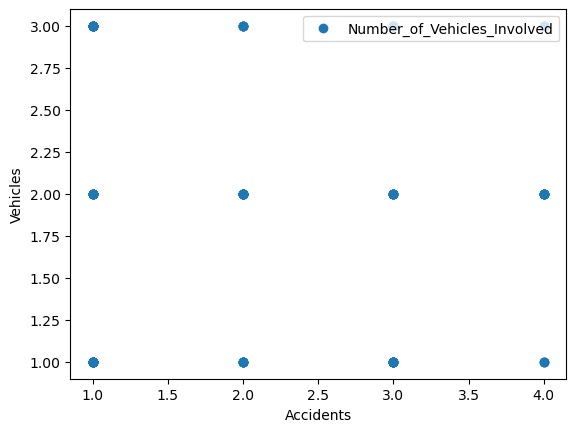

In [13]:
import matplotlib.pyplot as plt
data.plot(x='Number_of_Accidents', y='Number_of_Vehicles_Involved', style='o')
plt.xlabel('Accidents')
plt.ylabel('Vehicles')
plt.show()

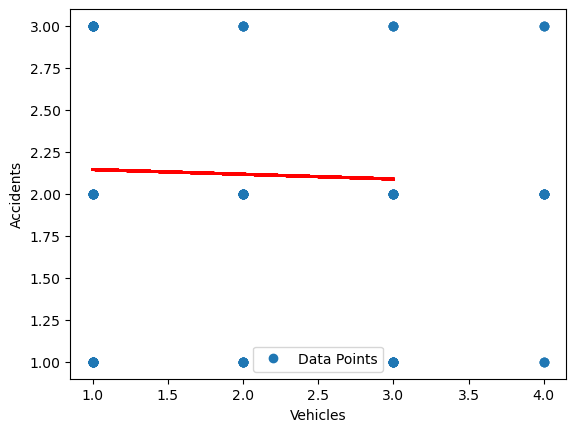

In [14]:
import pandas as pd
from sklearn.linear_model import LinearRegression

x = data[['Number_of_Vehicles_Involved']]
y = data[['Number_of_Accidents']]

regressor = LinearRegression()
regressor.fit(x, y)
data.plot(x='Number_of_Accidents', y='Number_of_Vehicles_Involved', style='o', label='Data Points')
plt.plot(x ,regressor.predict(x), color ='r', linewidth=2, label='Regressor Line')
plt.xlabel('Vehicles')
plt.ylabel('Accidents')
plt.show()

In [15]:
# split data into train and test sets
from sklearn.model_selection import train_test_split
X = pd.DataFrame(data['Number_of_Accidents'])
Y = pd.DataFrame(data['Number_of_Vehicles_Involved'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=1)

In [27]:
# train the algorithm using the training sets
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)



LinearRegression()

In [28]:
# intercept of linear regression
regressor.intercept_


array([1.69589977])

In [29]:
# slope of linear regression
regressor.coef_

array([[0.07517084]])

In [23]:
# predict the values of y given the values of x
y_pred = regressor.predict(X_test)
y_pred


array([[1.9214123 ],
       [1.84624146],
       [1.84624146],
       [1.77107062],
       [1.9214123 ],
       [1.9214123 ],
       [1.99658314],
       [1.77107062],
       [1.77107062],
       [1.9214123 ],
       [1.99658314],
       [1.9214123 ],
       [1.99658314],
       [1.9214123 ],
       [1.77107062],
       [1.77107062],
       [1.99658314],
       [1.84624146],
       [1.84624146],
       [1.77107062]])

In [18]:
# evaluate the algorithm
from sklearn import metrics
import numpy as np

# y_test and y_pred as arrays or dataframes
mae = metrics.mean_absolute_error(Y_test, y_pred)
mse = metrics.mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)

mae , mse, rmse

(0.8957858769931664, 0.9553356925296151, 0.9774127544336707)

In [20]:
import joblib
import pickle
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)

# save the model to disk
joblib.dump(model, 'severitymodel.pkl')

# alternatively, you can use pickle
with open('severitymodel.pkl', 'wb') as file:
    pickle.dump(model, file)

In [30]:
# using trained model
new_X = np.array([2.3,2.21,1.1,3,1]).reshape(-1,1)

model = joblib.load('severitymodel.pkl')

predictions = model.predict(new_X)

# create a dataframe with 1D array
new_data = pd.DataFrame({'Number of vehicles': new_X.flatten(), 'Number of accidents': predictions.flatten()})
new_data

c:\Users\user\miniconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


,Number of vehicles,Number of accidents
0,2.30,1.868793
1,2.21,1.862027
2,1.10,1.778588
3,3.00,1.921412
4,1.00,1.771071
